<a href="https://colab.research.google.com/github/JoshuaBarsky/Projects/blob/main/pi(x)_vs_R(x).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Prime Counting Function vs. Riemann Counting Function**

###$\pi(x)$ vs $R(x)$

The Prime Counting Function $\pi(x)$ is a function that is used to count the primes. This is a step graph where at each prime number on the x-axis the count goes up by 1 on the y-axis.

The Riemann Prime Counting Function $R(x)$ is a function that closely resembles the output of $\pi(x)$, where $R(x) = \sum_{n=1}^{\infty}\frac{\mu(n)}{n}li(x^{1/n})$.
<br><br><br>
It's also important to note that the Riemann Prime Counting Function is *identical* to the Gramm series $G(x)$, which utilizes the zeta function $\zeta(z)$. Where $G(x) = 1 + \sum_{k=1}^{\infty}\frac{ln(x)^k}{k k ! \zeta(k+1)}$. This distinctly draws a connection between the prime numbers and complex values $\mathbb{C}$ using the Zeta function $\zeta(z)$.
<br><br><br>
The following link contains more information on these functions described above.

https://mathworld.wolfram.com/RiemannPrimeCountingFunction.html

The following page is a very descriptive page describing an approach of adding non trivial zeros of $\zeta(z)$ that seemed a bit complicated to code in this project, but was very interesting to learn about.

https://empslocal.ex.ac.uk/people/staff/mrwatkin/zeta/encoding1.htm

A cool demo of adding the non trivial zeros can be found at the link below.

https://demonstrations.wolfram.com/HowTheZerosOfTheZetaFunctionPredictTheDistributionOfPrimes/

Another interesting source is the following YouTube video.

https://www.youtube.com/watch?v=zlm1aajH6gY

In [4]:
import mpmath as mp
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def primesuptolist(n):
  flags = np.full(n,True)
  flags[:2] = False
  p = 2
  uptolist = np.zeros(n)
  count = 0
  while p < n:
    if flags[p] == True:
      flags[p*p::p] = [False] * len(flags[p*p::p])
      count += 1
      uptolist[p] = count
    else:
      uptolist[p] = count
    p += 1
  return uptolist

**Graph of π(x)**

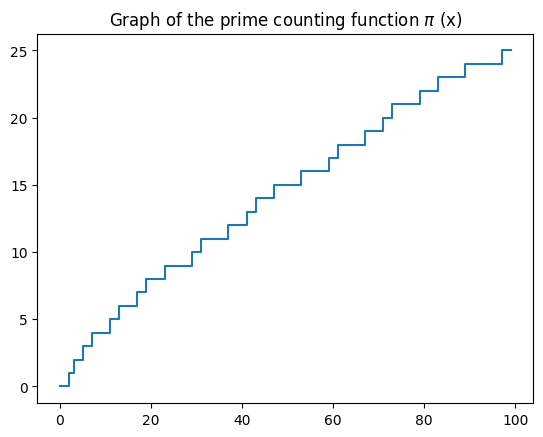

In [21]:

xval = np.arange(0,100)
yval = primesuptolist(100)
plt.step(xval,yval, where='post')
plt.title('Graph of the prime counting function $\pi$ (x)')
plt.show()

**First we define $\mu(n)$:**

This is also called the Mobius function, but this is not the focus of this project. This is only an additional function we must define in order to have a functioning $R(x)$ function.

In [10]:
def mu(n):
    if n == 1:
        return 1
    else:
        p = 0
        factors = fact(n) #returns an array of factors of n.
        for i in set(factors): #set() creates a set object, which is iterable.
            if factors.count(i) > 1: #count() counts the instances of an element in the list.
                return 0
            else:
                p = p + 1
        if p%2 == 0:
            return 1
        else:
            return -1

def fact(n): #factorizes a number n into its primes
    array = []
    i = 2
    while i**2 <= n: #same as while i <= sqrt(n)
        if n%i != 0: #if i is not a factor
            i = i + 1 #move on
        else:
            n = n//i #drops n by a factor of i
            array.append(i) #adds the factor i to the array
    if n>1: #if there is an additional factor of n, append it
        array.append(n)
    return array

**Now we define $R(x):$**

In [11]:
def R(x):
  ans = 0
  for i in range(10):
    ans += (mu(i+1)/(i+1))*mp.li(x**(1/(i+1))) #R(x) sum that was described above.
  if np.isnan(float(ans)): #there is an instance of NaN where an exception must be made.
    return 0
  else:
    return (ans)

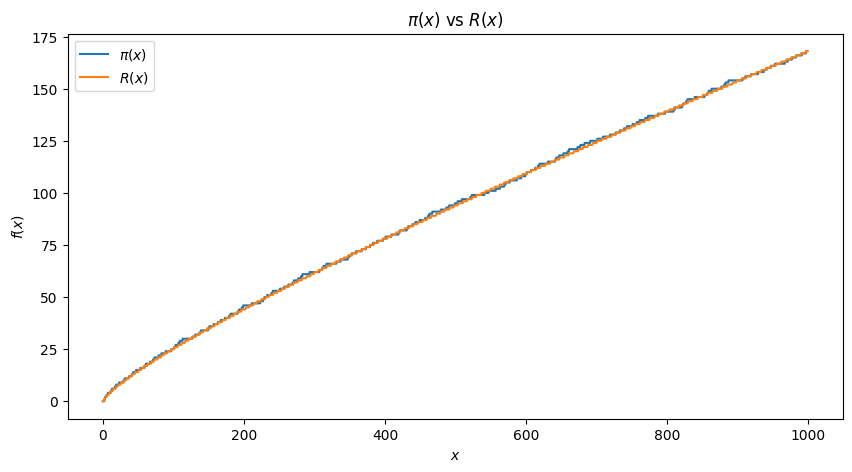

In [13]:
size=1000 #sample size to use. This is a little slow to work with so be mindful of the size.
(x, y) = np.arange(size), primesuptolist(size)
(x2, y2) = np.arange(size), np.array([int(R(xi)) for xi in np.arange(size)])
plt.figure(figsize=(10,5))
plt.step(x, y, where='post', label = '$\pi(x)$')
plt.plot(x2, y2, label = '$R(x)$')
plt.title('$\pi(x)$ vs $R(x)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()

As we can see, $\pi(x)$ and $R(x)$ are very close!

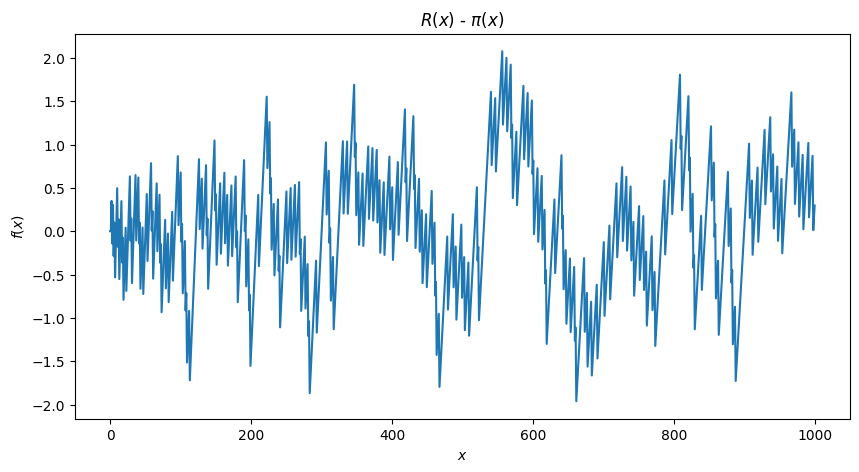

In [14]:
size=1000 #sample size to use. This is a little slow to work with so be mindful of the size.
(x3, y3) = np.arange(size),  np.array([R(xi) for xi in np.arange(size)]) - primesuptolist(size)
plt.figure(figsize=(10,5))
plt.plot(x3, y3)
plt.title('$R(x)$ - $\pi(x)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

This is how close the two functions are. Wow!

As we can see, there is an undeniable closeness relationship between the prime counting function and the Riemann countinf function.